In [13]:
from Perceptron import Perceptron
from LossFunction import LossFunction

Dans cet exemple, nous allons simuler le comportement de la porte logique OR sur 3 bits avec un entraînement 1000 itérations.

In [14]:
# OR gate
inputs_training = [
    [0, 0, 0],  # 0
    [0, 0, 1],  # 1
    [0, 1, 0],  # 1
    [0, 1, 1],  # 1
    [1, 0, 0],  # 1
    [1, 0, 1],  # 1
    [1, 1, 0],  # 1
    [1, 1, 1],  # 1
]
outputs_training = [0, 1, 1, 1, 1, 1, 1, 1]
nb_iter = 10_000

Nous créons ensuite notre objet `Perceptron` avec les paramètres permettant d'entraîner le neurone. Également, nous utiliserons la fonction Tangente Hyperbolique pour l'activation.

In [15]:
p = Perceptron(inputs_training, outputs_training, nb_iter, LossFunction.TANH)

Nous décidons ensuite d'afficher les informations pendant l'entraînement du neurone. Ainsi, nous aurons un visuel sur le pourcentage d'erreur du neurone à l'itération k. Nous afficherons ensuite l'évolution du taux d'erreur.

Pourcentage d'erreur (0) : 0.7851573815165486 -> 78.52%
Pourcentage d'erreur (1000) : 0.005723198997329688 -> 0.57%
Pourcentage d'erreur (2000) : 0.001439375670241531 -> 0.14%
Pourcentage d'erreur (3000) : 0.0006037046811916397 -> 0.06%
Pourcentage d'erreur (4000) : 0.0003233628302303177 -> 0.03%
Pourcentage d'erreur (5000) : 0.00019924584914050088 -> 0.02%
Pourcentage d'erreur (6000) : 0.0001343178192610241 -> 0.01%
Pourcentage d'erreur (7000) : 9.636816424391431e-05 -> 0.01%
Pourcentage d'erreur (8000) : 7.23657448548824e-05 -> 0.01%
Pourcentage d'erreur (9000) : 5.626315272464317e-05 -> 0.01%


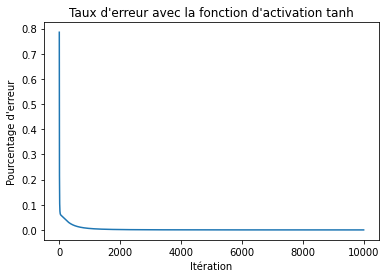

In [16]:
p.train(display_loss=True)
p.display_mean_squared_loss_graph()

Le bloc ci-dessous permet d'effectuer une prédiction avec notre neurone entraîné sur l'entrée [0, 0, 1]. En tant qu'humain, nous savons en appliquant la porte logique OR sur les bits 0, 0 et 1, le résultat sera 1.

Est-ce que notre neurone fraîchement entraîné saura trouver la bonne valeur ?

In [17]:
prob = p.guess([0, 0, 1])
print(f"Output: {prob}")

Output: 0.9945843559585799


Comme nous pouvons le voir dans le résultat du bloc ci-dessus, le résultat retourné par notre neurone est 0.945071... ce qui signifie que notre Perceptron a une probabilité de 94.5% de s'activer. Or, la probabilité augmente lorsque notre neurone "pense" que le résultat est 1. A l'inverse, la probabilité diminue lorsque notre neurone pense que la réponse est 0.

Nous remarquons donc que la probabilité est plutôt élevée ce qui signifie que notre neurone pense que le résultat de la porte logique OR sur les bits 0, 0 et 1 est 1.

Essayons maintenant sur les bits 0, 0 et 0. Si tout se passe bien, notre neurone devrait retourner une probabilité faible.

In [18]:
prob = p.guess([0, 0, 0])
print(f"Output: {prob}")

Output: 0.016478701638666323


Effectivement, notre neurone retourne la valeur 0.1913... ce qui est bien plus faible comparé à la probabilité précédente.

On en déduit donc que notre neurone a été entraîné convenablement pour ce problème donné. Cet entraînement a été rendu possible, car les données de la porte logique OR sur 3 bits sont linéairement séparable. Autrement-dit, nous pouvons placer un hyperplan de manière à séparer les entrées pour lesquelles le résultat est 0 et celles pour lesquelles le résultat est 1.

Essayons maintenant avec la porte logique XOR sur 2 bits avec le même nombre d'itérations pour l'entraînement, mais cette fois-ci avec la fonction Sigmoïde pour l'activation.

Pourcentage d'erreur (0) : 0.25125467684279656 -> 25.13%
Pourcentage d'erreur (1000) : 0.2512545981885783 -> 25.13%
Pourcentage d'erreur (2000) : 0.2512546741278102 -> 25.13%
Pourcentage d'erreur (3000) : 0.2512546949996377 -> 25.13%
Pourcentage d'erreur (4000) : 0.2512546993982512 -> 25.13%
Pourcentage d'erreur (5000) : 0.25125470030218683 -> 25.13%
Pourcentage d'erreur (6000) : 0.25125470048843435 -> 25.13%
Pourcentage d'erreur (7000) : 0.25125470052694887 -> 25.13%
Pourcentage d'erreur (8000) : 0.25125470053492915 -> 25.13%
Pourcentage d'erreur (9000) : 0.25125470053658416 -> 25.13%


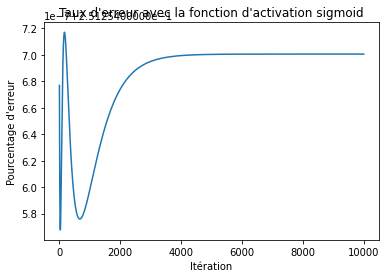

In [19]:
# XOR gate
inputs_training = [
    [0, 0],  # 0
    [0, 1],  # 1
    [1, 0],  # 1
    [1, 1],  # 0
]
outputs_training = [0, 1, 1, 0]

p = Perceptron(inputs_training, outputs_training, nb_iter, LossFunction.SIGMOID)

p.train(display_loss=True)
p.display_mean_squared_loss_graph()

Nous remarquons assez facilement que le taux d'erreur est bien différent du précédent. Ceci est dû au fait que la porte logique XOR n'est pas linéairement séparable. De ce fait, un seul neurone n'est pas suffisant pour résoudre ce problème.

In [20]:
prob = p.guess([0, 1])
print(f"Output: {prob}")

Output: 0.4999999999568976


Comme nous pouvons le voir avec le résultat retourné par notre neurone sur l'entrée 0 et 1, celui-ci est bien plus mitigé contrairement aux résultats précédents.